# Modeling: Single body with material assignment

In PyAnsys Geometry, a *body* represents solids or surfaces organized within the ``Design`` assembly.
The current state of sketch, which is a client-side execution, can be used for the operations of
the geometric design assembly.

The Geometry service provides data structures to create individual materials and their properties.
These data structures are exposed through PyAnsys Geometry.

This example shows how to create a single body from a sketch by requesting its extrusion. It then
shows how to assign a material to this body.

## Perform required imports

Perform the required imports.

In [1]:
from pint import Quantity

from ansys.geometry.core import Modeler
from ansys.geometry.core.materials import Material, MaterialProperty, MaterialPropertyType
from ansys.geometry.core.math import UNITVECTOR3D_Z, Frame, Plane, Point2D, Point3D, UnitVector3D
from ansys.geometry.core.misc import UNITS
from ansys.geometry.core.sketch import Sketch

## Create sketch

Create a ``Sketch`` instance and insert a circle with a radius of 10 millimeters
in the default plane.

In [2]:
sketch = Sketch()
sketch.circle(Point2D([10, 10], UNITS.mm), Quantity(10, UNITS.mm))

## Initiate design on server

Establish a server connection and initiate a design on the server.

In [3]:
modeler = Modeler()
design_name = "ExtrudeProfile"
design = modeler.create_design(design_name)

## Add materials to design

Add materials and their properties to the design. Material
properties can be added when creating the ``Material`` object or after
its creation. This code adds material properties after creating
the ``Material`` object.

In [4]:
density = Quantity(125, 10 * UNITS.kg / (UNITS.m * UNITS.m * UNITS.m))
poisson_ratio = Quantity(0.33, UNITS.dimensionless)
tensile_strength = Quantity(45)
material = Material(
    "steel",
    density,
    [MaterialProperty(MaterialPropertyType.POISSON_RATIO, "PoissonRatio", poisson_ratio)],
)
material.add_property(MaterialPropertyType.TENSILE_STRENGTH, "TensileProp", Quantity(45))
design.add_material(material)

## Extrude sketch to create body

Extrude the sketch to create the body and then assign a material to it.

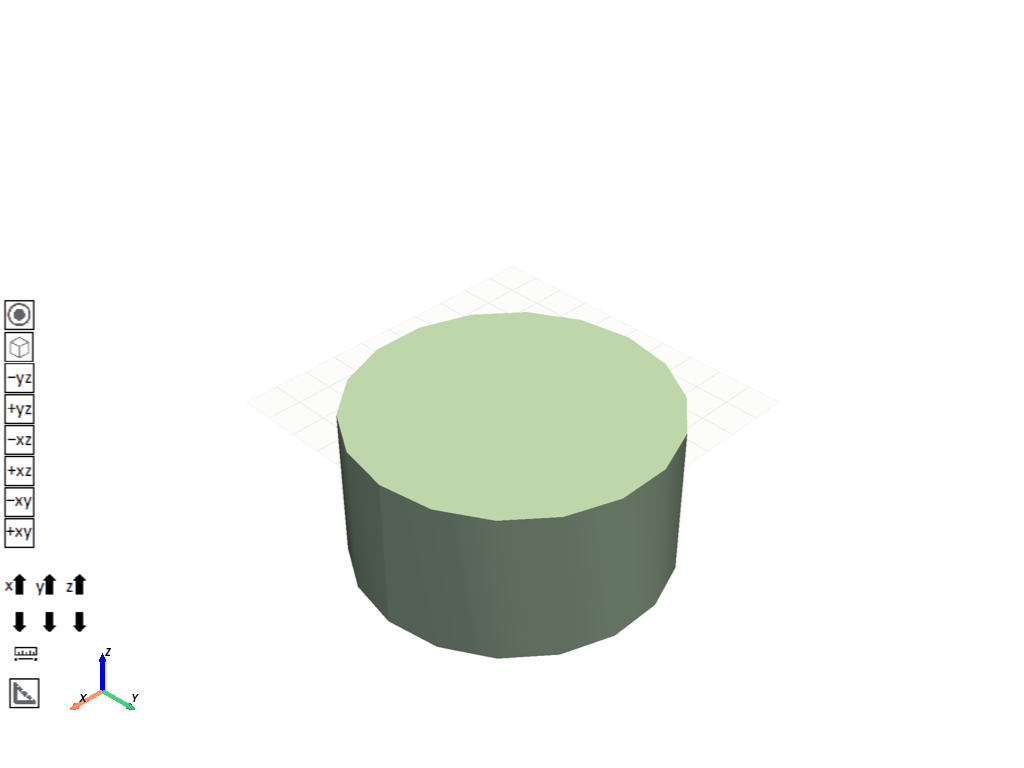

In [5]:
# Extrude the sketch to create the body
body = design.extrude_sketch("SingleBody", sketch, Quantity(10, UNITS.mm))

# Assign a material to the body
body.assign_material(material)

body.plot()